<a href="https://colab.research.google.com/github/makhmudjumanazarov/deep_learning/blob/main/02_Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 

In [6]:
import numpy as np 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import seaborn as sns 

In [9]:
df = pd.read_csv('/content/drive/MyDrive/tensorflow/cancer_classification.csv')

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


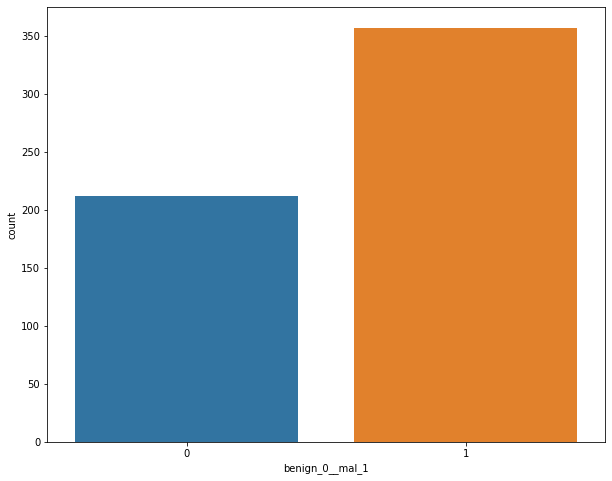

In [17]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'benign_0__mal_1', data = df)

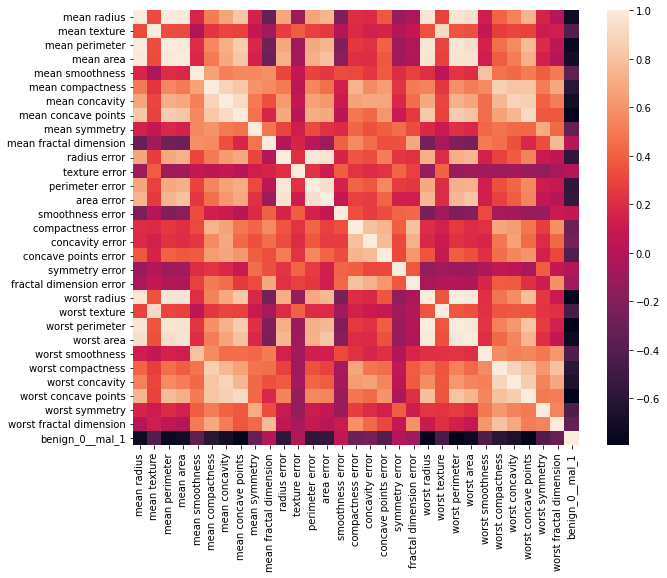

In [19]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr()) 

In [20]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

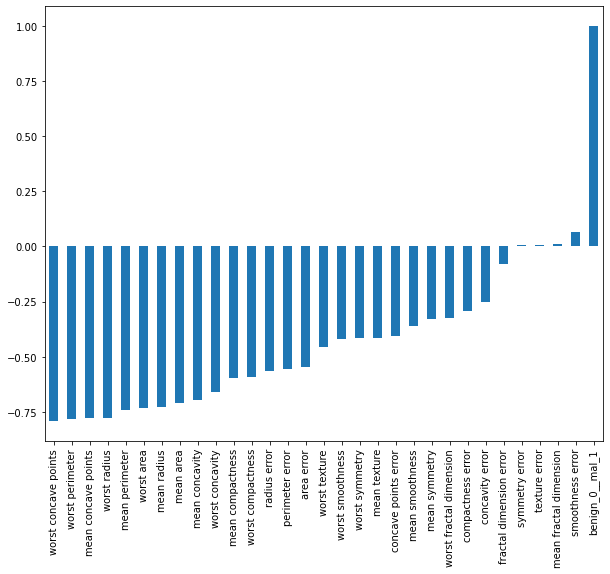

In [23]:
plt.figure(figsize = (10, 8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

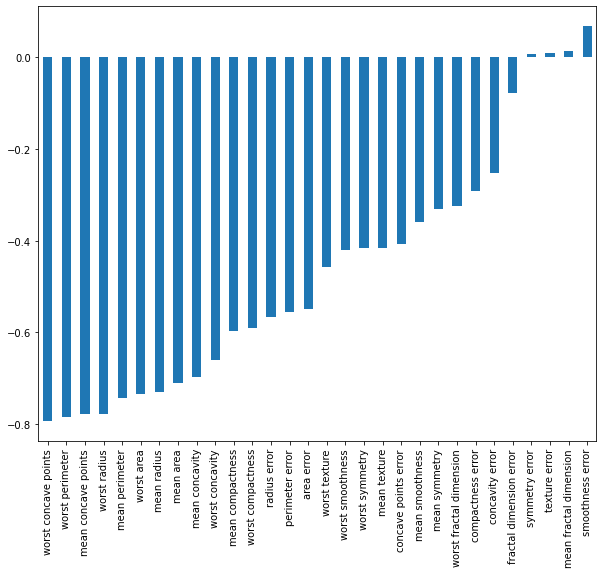

In [24]:
plt.figure(figsize = (10, 8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')  

In [25]:
df.corr()['benign_0__mal_1'][:-1]

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [26]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [30]:
X = df.drop('benign_0__mal_1', axis = 1).values 
y = df['benign_0__mal_1'].values 

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [34]:
from sklearn.preprocessing import MinMaxScaler 

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [38]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [41]:
X_train.shape

(426, 30)

In [67]:
model = Sequential()
model.add(Dense(units=30, activation = 'relu'))
model.add(Dense(units=15, activation = 'relu'))

model.add(Dense(units=1, activation = 'sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [68]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7780 - val_loss: 0.6596
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5552 - val_loss: 0.5535
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4744 - val_loss: 0.4931
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4311 - val_loss: 0.4452
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3861 - val_loss: 0.3970
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3424 - val_loss: 0.3616
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3103 - val_loss: 0.3271
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2894 - val_loss: 0.3017
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2633 - val_loss: 0.2785
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2429 - val_loss: 0.2575
Epoch 11

In [69]:
model_loss = pd.DataFrame(model.history.history)

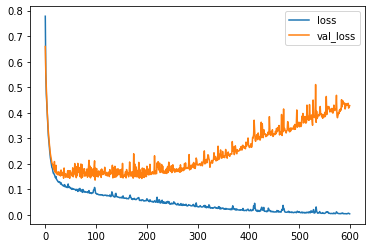

In [70]:
model_loss.plot()

In [59]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          batch_size = 128
          )

Epoch 1/600
4/4 [==============================] - 0s 34ms/step - loss: 1.3153e-05 - val_loss: 0.9507
Epoch 2/600
4/4 [==============================] - 0s 10ms/step - loss: 1.3318e-05 - val_loss: 0.9523
Epoch 3/600
4/4 [==============================] - 0s 11ms/step - loss: 1.3417e-05 - val_loss: 0.9525
Epoch 4/600
4/4 [==============================] - 0s 9ms/step - loss: 1.3233e-05 - val_loss: 0.9510
Epoch 5/600
4/4 [==============================] - 0s 9ms/step - loss: 1.3065e-05 - val_loss: 0.9497
Epoch 6/600
4/4 [==============================] - 0s 10ms/step - loss: 1.3005e-05 - val_loss: 0.9491
Epoch 7/600
4/4 [==============================] - 0s 9ms/step - loss: 1.3028e-05 - val_loss: 0.9481
Epoch 8/600
4/4 [==============================] - 0s 10ms/step - loss: 1.2968e-05 - val_loss: 0.9472
Epoch 9/600
4/4 [==============================] - 0s 15ms/step - loss: 1.3065e-05 - val_loss: 0.9460
Epoch 10/600
4/4 [==============================] - 0s 9ms/step - loss: 1.3105e-05 - 

In [60]:
model_loss = pd.DataFrame(model.history.history)

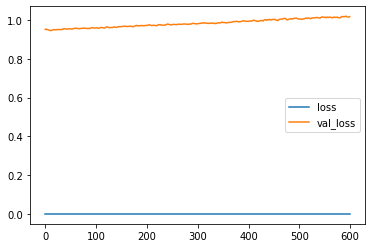

In [61]:
model_loss.plot()

In [72]:
model = Sequential()
model.add(Dense(units=30, activation = 'relu'))
model.add(Dense(units=15, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [75]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 600, 
          validation_data = (X_test, y_test),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 1.4654 - val_loss: 0.9150
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7908 - val_loss: 0.6670
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6297 - val_loss: 0.6313
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5904 - val_loss: 0.5912
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5492 - val_loss: 0.5527
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5160 - val_loss: 0.5213
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4829 - val_loss: 0.4922
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4469 - val_loss: 0.4607
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4183 - val_loss: 0.4333
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3878 - val_loss: 0.4084
Epoch 11

In [76]:
model_loss = pd.DataFrame(model.history.history)

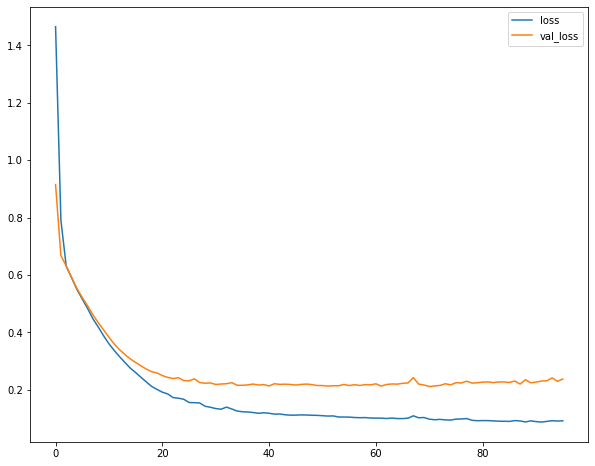

In [78]:
model_loss.plot(figsize = (10, 8))

In [79]:
from tensorflow.keras.layers import Dropout

In [82]:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [83]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test), verbose = 1,
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 1.6572 - val_loss: 0.6909
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 1.1307 - val_loss: 0.6286
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.9454 - val_loss: 0.6336
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.8224 - val_loss: 0.6155
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.8365 - val_loss: 0.6026
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7972 - val_loss: 0.5835
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7320 - val_loss: 0.5695
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7010 - val_loss: 0.5595
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6610 - val_loss: 0.5496
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6301 - val_loss: 0.5373
Epoch 11

In [84]:
model_loss = pd.DataFrame(model.history.history)

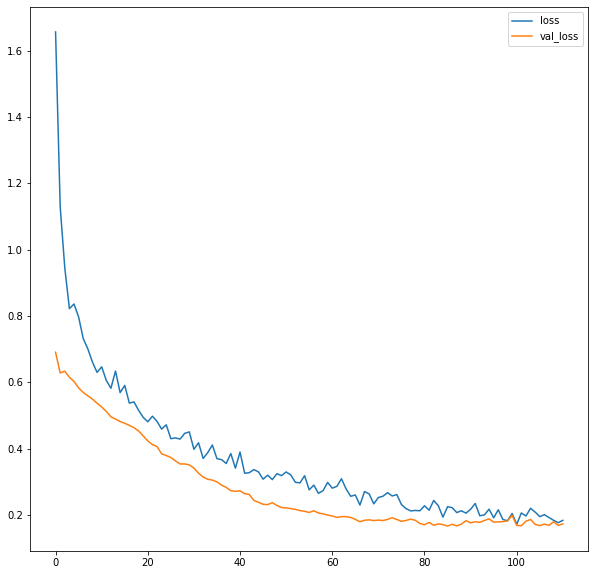

In [85]:
model_loss.plot(figsize = (10, 10))

In [93]:
predictions = model.predict(X_test) 

5/5 [==============================] - 0s 3ms/step


In [95]:
predictions = model.predict(X_test)

predictions = np.round(predictions).astype(int)

5/5 [==============================] - 0s 2ms/step


In [96]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [97]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.95      0.93      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [99]:
print(confusion_matrix(y_test,predictions))

[[51  4]
 [ 6 82]]
